Here we will list all statistical plots shown in the Lecture notes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Total income vs Loan Amount

In [2]:
df1 = pd.read_csv('loan50.csv')

In [3]:
df1[["total_income", "loan_amount"]].head(10)

,total_income,loan_amount
0,59000,22000
1,60000,6000
2,75000,25000
3,75000,6000
4,254000,25000
5,67000,6400
6,28800,3000
7,80000,14500
8,34000,10000
9,192000,18500


In [4]:
def calculate_descriptive_stats(dataframe, columns):
    """
    Calculate descriptive statistics for specified columns in a DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    columns (list): A list of column names for which statistics should be calculated.

    Returns:
    pd.DataFrame: A DataFrame containing descriptive statistics for the specified columns.
    """

    # Select the specified columns from the DataFrame
    selected_data = dataframe[columns]

    # Calculate statistics
    stats = {
        'Mean': selected_data.mean(),
        'Median': selected_data.median(),
        'Std Deviation': selected_data.std(),
        'Variance': selected_data.var(),
        'Mode': selected_data.mode().iloc[0]  # Calculate the mode and select the first mode if multiple modes exist
    }

    # Calculate percentiles (25th, 50th, and 75th percentiles)
    percentiles = selected_data.quantile([0.25, 0.50, 0.75])

    # Create a DataFrame to store the results
    result_df = pd.DataFrame(stats)
    result_df['25th Percentile'] = percentiles.loc[0.25]
    result_df['50th Percentile'] = percentiles.loc[0.50]
    result_df['75th Percentile'] = percentiles.loc[0.75]

    return result_df

In [5]:
selected_columns = ["total_income", "loan_amount"]
result_statistics = calculate_descriptive_stats(df1, selected_columns)
print(result_statistics)

                   Mean   Median  Std Deviation      Variance     Mode  \
total_income  105220.56  78750.0   68141.967716  4.643328e+09  34000.0   
loan_amount    17083.00  15500.0   10455.456343  1.093166e+08   6000.0   

              25th Percentile  50th Percentile  75th Percentile  
total_income          60000.0          78750.0         119000.0  
loan_amount            7125.0          15500.0          24000.0  


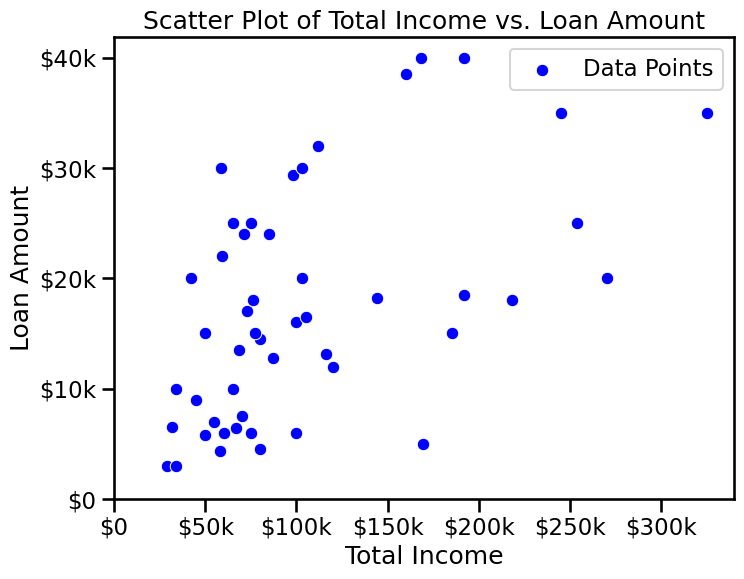

In [6]:
# Set the Seaborn style
sns.set_context("talk")

# Create a scatter plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x="total_income", y="loan_amount",marker='o', color='blue', label='Data Points')

# Set x and y axis labels
plt.xlabel('Total Income')
plt.ylabel('Loan Amount')

# Set custom x-axis and y-axis tick labels
plt.xticks([0, 50000, 100000, 150000, 200000, 250000, 300000], ['$0', '$50k', '$100k', '$150k', '$200k', '$250k', '$300k'])
plt.yticks([0, 10000, 20000, 30000, 40000], ['$0', '$10k', '$20k', '$30k', '$40k'])

# Add title
plt.title('Scatter Plot of Total Income vs. Loan Amount')

# Save the plot to a file (e.g., PNG format)
plt.savefig('Total_Income_vs_Loan_Amount.png')

# Show the plot
plt.legend()
plt.show()


# Frequency

In [7]:
df2 = pd.read_csv('auto.csv')

In [8]:
df2['Cost'].value_counts()

62     4
68     3
75     3
79     3
69     3
97     3
71     2
74     2
72     2
105    2
80     2
65     1
67     1
83     1
88     1
82     1
85     1
109    1
98     1
101    1
91     1
76     1
77     1
104    1
78     1
66     1
89     1
99     1
52     1
57     1
93     1
73     1
Name: Cost, dtype: int64

In [9]:
df2_freq = df2['Cost'].value_counts().reset_index()
df2_freq.columns = ['Pasts Cost', 'Frequency']
df2_freq

,Pasts Cost,Frequency
0,62,4
1,68,3
2,75,3
3,79,3
4,69,3
5,97,3
6,71,2
7,74,2
8,72,2
9,105,2


In [10]:
df2_freq.sort_values('Pasts Cost')

,Pasts Cost,Frequency
28,52,1
29,57,1
0,62,4
11,65,1
25,66,1
12,67,1
1,68,3
4,69,3
6,71,2
8,72,2


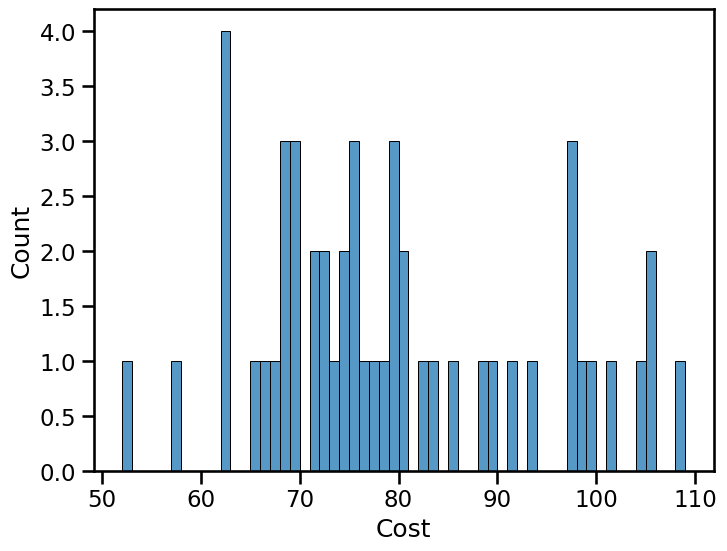

In [11]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df2, x="Cost", binwidth=1)

# Save the plot to a file (e.g., PNG format)
plt.savefig('Frequency.png')

# Histogram

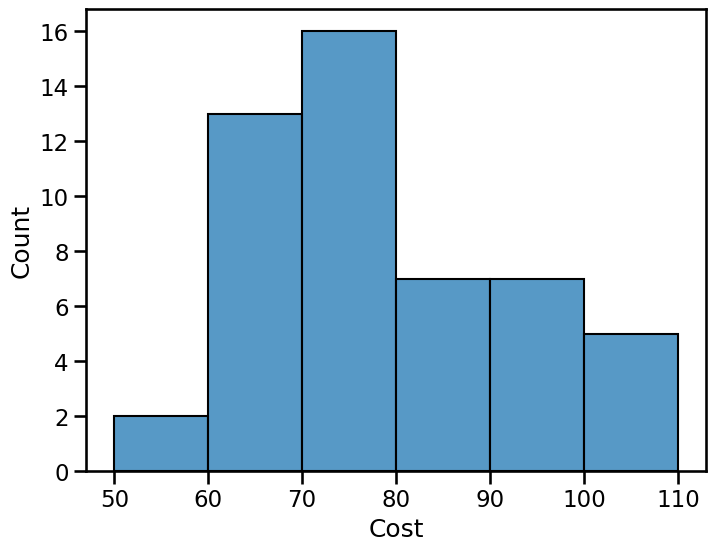

In [12]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df2, x="Cost", binwidth=10, binrange=[50, 110])

# Save the plot to a file (e.g., PNG format)
plt.savefig('Frequency-Histogram.png')

# Density Plot

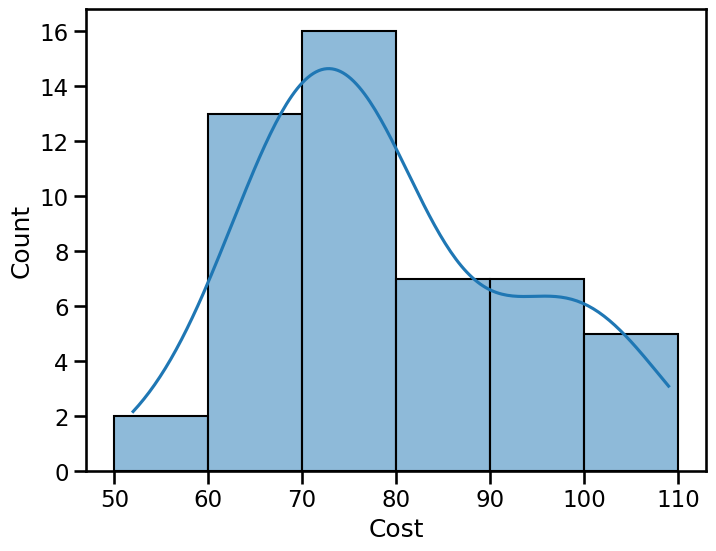

In [13]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df2, x="Cost", binwidth=10, binrange=[50, 110], kde=True)

# Save the plot to a file (e.g., PNG format)
plt.savefig('Frequency-Histogram-kde.png')

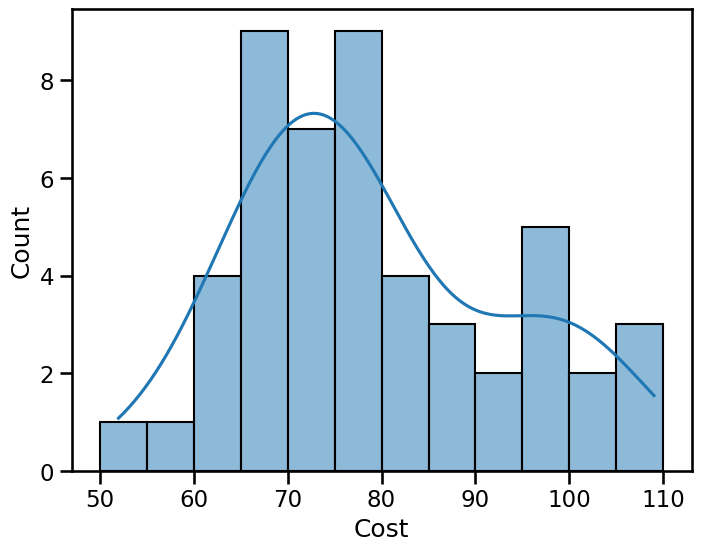

In [14]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df2, x="Cost", binwidth=5, binrange=[50, 110], kde=True)

# Save the plot to a file (e.g., PNG format)
plt.savefig('Frequency-Histogram-kde-5.png')

# Bar Plot

In [15]:
df1[['grade', 'homeownership', 'total_income']]

,grade,homeownership,total_income
0,B,rent,59000
1,B,rent,60000
2,E,mortgage,75000
3,B,rent,75000
4,B,mortgage,254000
5,B,mortgage,67000
6,D,rent,28800
7,A,mortgage,80000
8,A,rent,34000
9,C,mortgage,192000


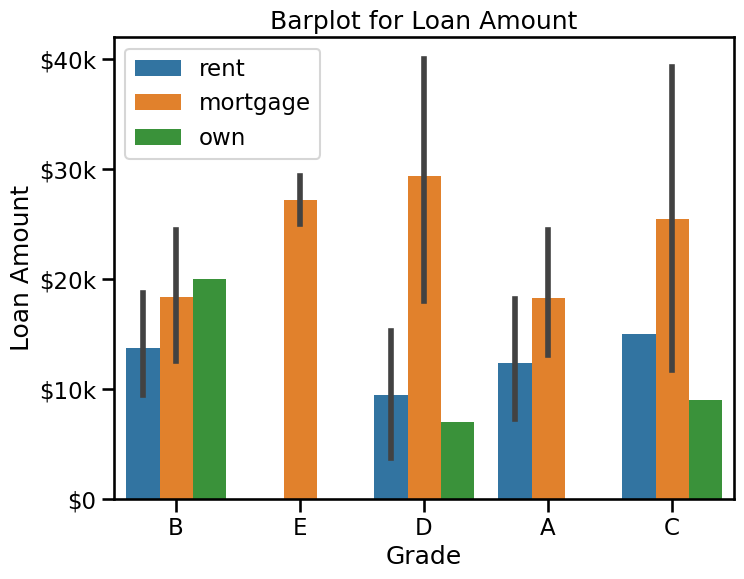

In [65]:
plt.figure(figsize=(8, 6))

sns.barplot(data=df1, x="grade", y="loan_amount", hue="homeownership")

# Set x and y axis labels
plt.xlabel('Grade')
plt.ylabel('Loan Amount')

# Set custom y-axis tick labels
plt.yticks([0, 10000, 20000, 30000, 40000], ['$0', '$10k', '$20k', '$30k', '$40k'])

# Add title
plt.title('Barplot for Loan Amount')

# Show the plot
plt.legend()

# Save the plot to a file (e.g., PNG format)
plt.savefig('barplot.png')

plt.show()

# Mosaic Plot

In [20]:
crosstable=pd.crosstab(df1['homeownership'],df1['loan_status'])
print(crosstable)

loan_status    Current  Fully Paid
homeownership                     
mortgage            21           5
own                  3           0
rent                20           1


In [24]:
crosstable

loan_status,Current,Fully Paid
homeownership,,
mortgage,21,5
own,3,0
rent,20,1


In [21]:
from statsmodels.graphics.mosaicplot import mosaic

<Figure size 1000x600 with 0 Axes>

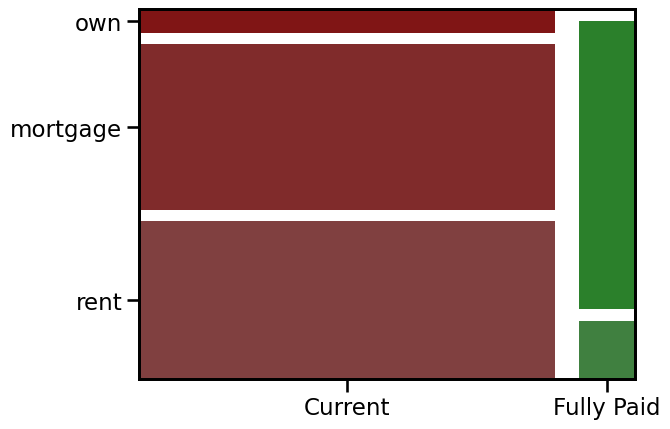

In [42]:
plt.figure(figsize=(10, 6))
mosaic(df1, ['loan_status', 'homeownership'],
       gap=0.05,
#        title = 'Two-variable mosaic plot for both homeownership and loan status',
      labelizer=lambda _: '')

# Save the plot to a file (e.g., PNG format)
plt.savefig('mosaic.png')

# Boxplot

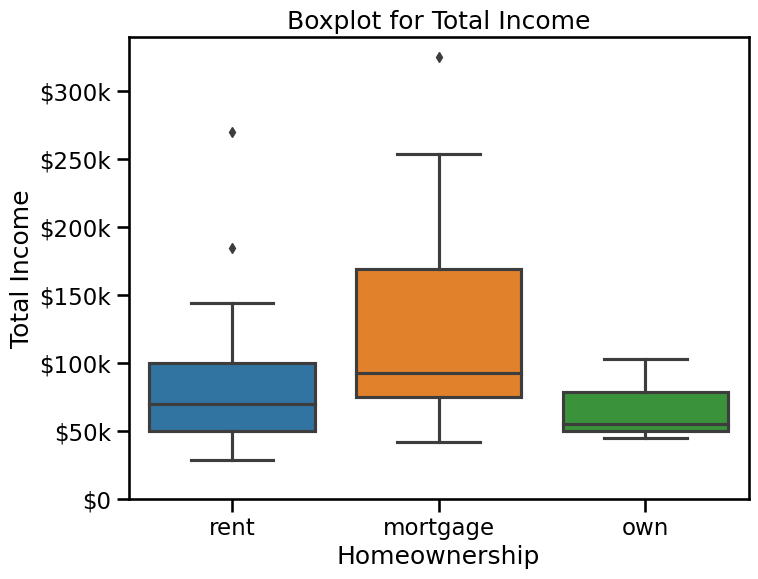

In [53]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df1, x="homeownership", y="total_income")

# Set custom x-axis and y-axis tick labels
plt.yticks([0, 50000, 100000, 150000, 200000, 250000, 300000], ['$0', '$50k', '$100k', '$150k', '$200k', '$250k', '$300k'])

# Set x and y axis labels
plt.ylabel('Total Income')
plt.xlabel('Homeownership')

# Add title
plt.title('Boxplot for Total Income')

# # Show the plot
# plt.legend()

# Save the plot to a file (e.g., PNG format)
plt.savefig('boxplot.png')

plt.show()

# Violinplot

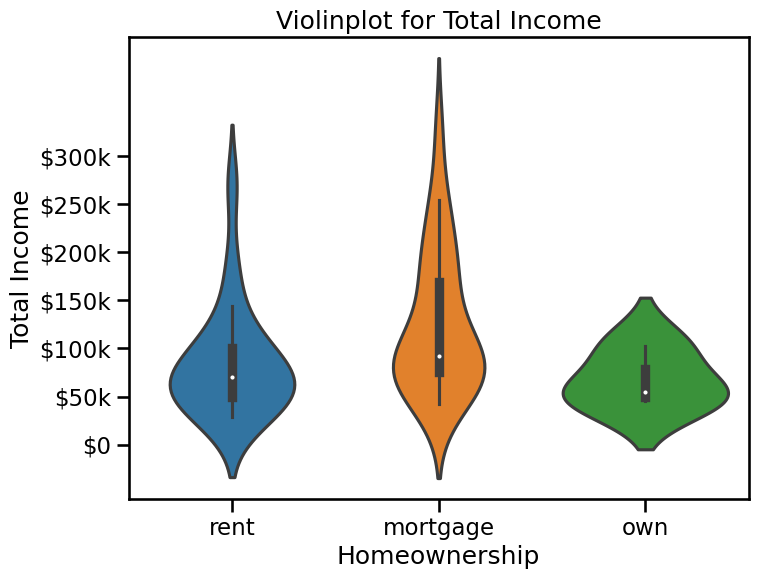

In [55]:
plt.figure(figsize=(8, 6))

sns.violinplot(data=df1, x="homeownership", y="total_income")

# Set custom x-axis and y-axis tick labels
plt.yticks([0, 50000, 100000, 150000, 200000, 250000, 300000], ['$0', '$50k', '$100k', '$150k', '$200k', '$250k', '$300k'])

# Set x and y axis labels
plt.ylabel('Total Income')
plt.xlabel('Homeownership')

# Add title
plt.title('Violinplot for Total Income')

# # Show the plot
# plt.legend()

# Save the plot to a file (e.g., PNG format)
plt.savefig('violinplot.png')

plt.show()